In [3]:
import tensorflow as tf
import torch
import numpy as np

2023-05-18 21:15:44.261798: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Pytorch 矩陣定義

In [4]:
# 0維的張量就是純量

x_0d = torch.tensor(1)

print(x_0d)

tensor(1)


In [5]:
# 1維的張量就是向量

x_1d = torch.tensor([1, 2, 3, 4])

print(x_1d)

tensor([1, 2, 3, 4])


In [6]:
# 2維的張量就是矩陣

x_2d = torch.tensor([[1, 2],
                  [3, 4]])

print(x_2d)

tensor([[1, 2],
        [3, 4]])


In [7]:
# 更高維度的張量

x_3d = torch.tensor([[[1, 2],
                      [3, 4]],
                     
                     [[5, 6],
                      [7, 8]]])

print(x_3d)


tensor([[[1, 2],
         [3, 4]],

        [[5, 6],
         [7, 8]]])


### 用「形狀」的方式來想像矩陣
你會發現...為度越高，越難理解，所以我們必須用矩陣的形狀來幫助我們理解

In [8]:
print(x_3d) # 超複雜，不知道在幹嘛

print(x_3d.shape) # 2x2x2 的矩陣
print(x_3d.size()) # 也可以這樣寫，結果一樣

tensor([[[1, 2],
         [3, 4]],

        [[5, 6],
         [7, 8]]])
torch.Size([2, 2, 2])
torch.Size([2, 2, 2])


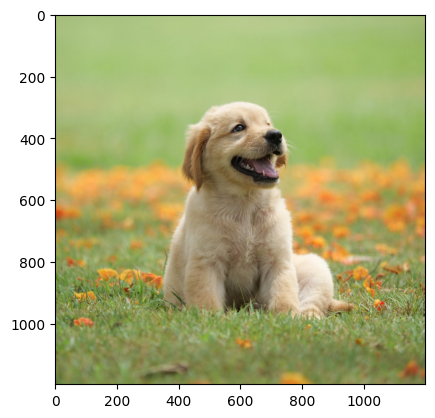

(1197, 1200, 3)


In [9]:
# read images
import matplotlib.pyplot as plt
import cv2

img = cv2.imread('dog.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()
print(img.shape) # 3維的張量：(高度，寬度，顏色)

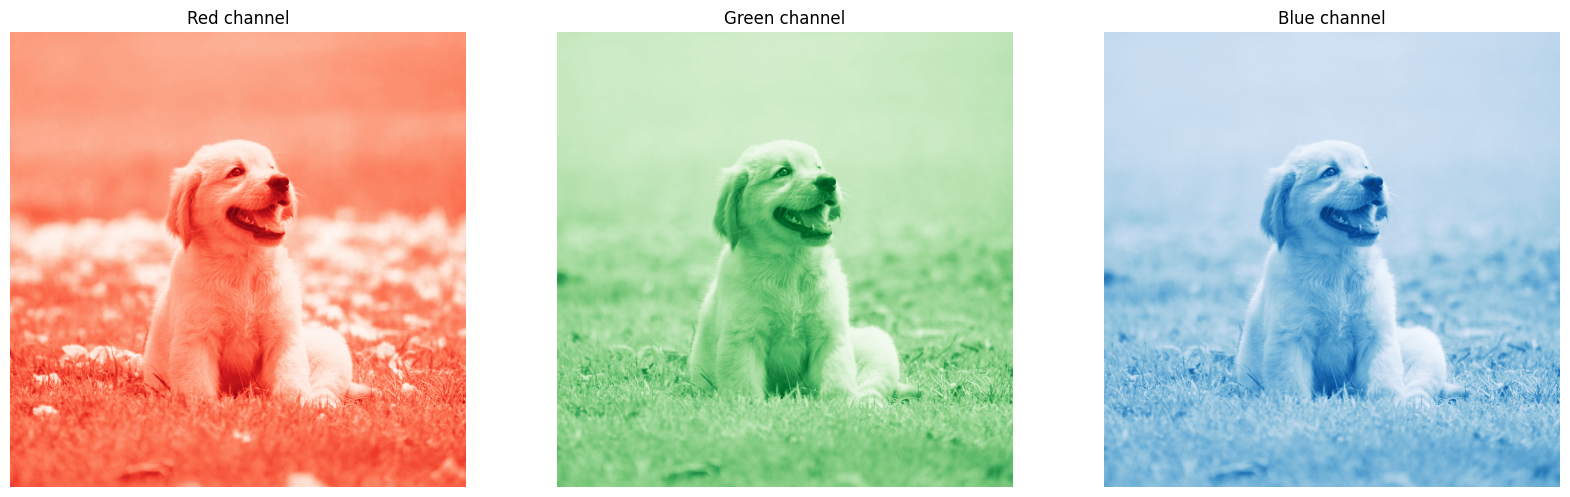

In [13]:
# 顯示每個顏色通道
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 10))

ax1.imshow(img[:, :, 0], cmap='Reds_r')
ax1.set_title('Red channel')
ax1.axis('off')

ax2.imshow(img[:, :, 1], cmap='Greens_r')
ax2.set_title('Green channel')
ax2.axis('off')

ax3.imshow(img[:, :, 1], cmap='Blues_r')
ax3.set_title('Blue channel')
ax3.axis('off')

plt.show()

In [24]:
# 也可以用 shape 的概念來定義矩陣

# reshape
x = torch.arange(9)
print(x)
print(x.shape)
print("\n***after resape***\n")
x_3x3 = x.reshape(3, 3)
print(x_3x3)
print(x_3x3.shape)

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8])
torch.Size([9])

***after resape***

tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])
torch.Size([3, 3])


In [25]:
# 零矩陣
x = torch.zeros((2, 3)) # 2x3 的零矩陣
print(x)

tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [26]:
# 一矩陣
x = torch.ones((2, 3)) # 2x3 的一矩陣
print(x)

tensor([[1., 1., 1.],
        [1., 1., 1.]])


In [23]:
# 單位矩陣
x = torch.eye(3) # 3x3 的單位矩陣
print(x)

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])


In [31]:
# arange
# torch.arange(start, end, step), 從 `start` 開始，每次增加 `step`，直到 `end` 為止(不包含 end)

x = torch.arange(5, 10, 2) # [5, 7, 9]
print(x)
x = torch.arange(5, 10) # [5~9], 等同 torch.arange(5, 10, 1)
print(x)
x = torch.arange(5) # [0~4], 等同 torch.arange(0, 5, 1)
print(x)



tensor([5, 7, 9])
tensor([5, 6, 7, 8, 9])
tensor([0, 1, 2, 3, 4])


In [36]:
# linspace
# torch.linspace(start, end, steps), 從 `start` 開始，到 `end` 為止(包含 end)，平分成 `steps` 個數

x = torch.linspace(0, 10, 5) # [0, 2.5, 5, 7.5, 10]
print(x)



tensor([ 0.0000,  2.5000,  5.0000,  7.5000, 10.0000])
tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])
tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])


In [67]:
##################################
# Your turn!
# 請把下面的程式碼改成用 linspace:
# a = torch.arange(0, 11, 1)
##################################

a = torch.linspace(start = None, end = None, steps = None) # 把 None 改成正確的數字
print(a)

TypeError: linspace(): argument 'start' must be Number, not NoneType

### 矩陣呼叫
根本是在轉魔數方塊吧...

In [65]:
# 1D tensor
x = torch.arange(10)
print(x)

# indexing
print(x[0])         # 第1個元素
print(x[3])         # 第4個元素
print(x[-1])        # 最後1個元素
print(x[-2])        # 倒數第2個元素
print("\n")
print(x[2:5])       # 第3到第5個元素
print(x[3:])        # 第4個之後的全部元素
print(x[:5])        # 第5個之前的全部元素
print(x[:])         # 全部元素
print(x[1:7:2])     # 第2到第7個，每2個取1個元素
print(x[::3])       # 全部元素，每3個取1個元素
# print(x[::-1])    # 全部元素，反向排序 (這個作法 torch 不支援，只能在 numpy 中使用)
# [9 8 7 6 5 4 3 2 1 0]

# 如果你想嘗試，先轉型成 numpy array
x_np = x.numpy()
print(x_np[::-1])

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
tensor(0)
tensor(3)
tensor(9)
tensor(8)


tensor([2, 3, 4])
tensor([3, 4, 5, 6, 7, 8, 9])
tensor([0, 1, 2, 3, 4])
tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
tensor([1, 3, 5])
tensor([0, 3, 6, 9])
[9 8 7 6 5 4 3 2 1 0]


In [70]:
# 2D tensor
# 2D 張量也可以用同樣的方法索引，只是要用逗號隔開 row 和 column

x = torch.arange(12).reshape(3, 4)
print(x)

print(x[0, 0])      # 第1列第1個元素
print(x[1, 2])      # 第2列第3個元素
print(x[2, -1])     # 第3列最後1個元素
print("\n")
print(x[1, :])      # 第2列全部元素
print(x[:, 2])      # 第3行全部元素
print(x[0:2, 1:3])    # 第3列全部元素
print(x[::2, ::2])  # 隔1列、隔1行取全部元素

x_np = x.numpy()
print(x_np[:, ::-1]) # 全部列反向排序

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])
tensor(0)
tensor(6)
tensor(11)


tensor([4, 5, 6, 7])
tensor([ 2,  6, 10])
tensor([[1, 2],
        [5, 6]])
tensor([[ 0,  2],
        [ 8, 10]])
[[ 3  2  1  0]
 [ 7  6  5  4]
 [11 10  9  8]]
[[ 8  9 10 11]
 [ 4  5  6  7]
 [ 0  1  2  3]]


In [75]:
# 3D tensor

#########################################
# Your turn!
# x = torch.arange(24).reshape(2, 3, 4)，
# 請用剛剛那些方印出下面的結果：
#
# tensor([[[ 0,  2],
#          [ 8, 10],
#          [16, 18]],
#
#         [[24, 26],
#          [32, 34],
#          [40, 42]]])
#########################################


x = torch.arange(48).reshape(2, 6, 4)
print(x)

x = x[None, None, None] # 把 None 改成正確的索引

print(x)



tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11],
         [12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]],

        [[24, 25, 26, 27],
         [28, 29, 30, 31],
         [32, 33, 34, 35],
         [36, 37, 38, 39],
         [40, 41, 42, 43],
         [44, 45, 46, 47]]])
tensor([[[ 0,  2],
         [ 8, 10],
         [16, 18]],

        [[24, 26],
         [32, 34],
         [40, 42]]])


# 矩陣運算

### 矩陣相加

In [86]:
# 矩陣相加
a = torch.arange(6).reshape(2, 3)
b = torch.arange(1,13,2).reshape(2, 3)
c = a + b
print(a)
print(b)
print(c)

d = a + 1
print(d) # 可以直接加一個純量

tensor([[0, 1, 2],
        [3, 4, 5]])
tensor([[ 1,  3,  5],
        [ 7,  9, 11]])
tensor([[ 1,  4,  7],
        [10, 13, 16]])
tensor([[1, 2, 3],
        [4, 5, 6]])


### Pytorch 矩陣相成
- 對應元素相成
- 矩陣乘法
- 更多特殊用法可以[參考這裡](https://blog.csdn.net/da_kao_la/article/details/87484403)


In [89]:
# 對應元素相乘 (m*n) * (m*n) = (m*n)
a = torch.arange(6).reshape(2, 3)
b = torch.arange(1,13,2).reshape(2, 3)
c = a * b
print(a)
print(b)
print(c)

c = torch.mul(a, b)
print(c) # 也可以用 torch.mul

d = a * 0.5
print(d) # 可以直接乘一個純量

e = 1 / a
print(e) # 也可以直接除一個純量

tensor([[0, 1, 2],
        [3, 4, 5]])
tensor([[ 1,  3,  5],
        [ 7,  9, 11]])
tensor([[ 0,  3, 10],
        [21, 36, 55]])
tensor([[ 0,  3, 10],
        [21, 36, 55]])
tensor([[0.0000, 0.5000, 1.0000],
        [1.5000, 2.0000, 2.5000]])
tensor([[   inf, 1.0000, 0.5000],
        [0.3333, 0.2500, 0.2000]])


In [85]:
# 矩陣乘法 (m*n) x (n*p) = (m*p)
a = torch.arange(6).reshape(2, 3)       # 2x3 的矩陣
b = torch.arange(1,13,2).reshape(3, 2)  # 3x2 的矩陣
c = torch.matmul(a, b)                  # 2x2 的矩陣
print(a)
print(b)
print(c)

c = a @ b
print(c) # 也可以用 @ 符號

tensor([[0, 1, 2],
        [3, 4, 5]])
tensor([[ 1,  3],
        [ 5,  7],
        [ 9, 11]])
tensor([[23, 29],
        [68, 92]])
tensor([[23, 29],
        [68, 92]])


In [95]:
# 反矩陣
a = torch.Tensor([1,2,3]).reshape(3, 1)
b = torch.randn(3, 3) # 用亂數產生一個 3x3 的矩陣

# c = ba
c = torch.matmul(b, a)

print("matrix a:")
print(a)
print("\nmatrix b:")
print(b)
print("\nmatrix ab:")
print(c)

# 有時候會遇到反矩陣不存在的情況，所以用 while 迴圈不斷產生亂數，直到反矩陣存在為止
while(True): 
    try: # 嘗試計算反矩陣， 如果成功，就跳出迴圈
        d = torch.inverse(b) # 反矩陣
        break

    except: # 反矩陣不存在，就再產生一個亂數
        b = torch.randn(3, 3)

print("\nmatrix b^-1:")
print(d)

# c = ba => a = (b^-1)c
e = torch.matmul(d, c)

print("\nmatrix e (should be the same as a):")
print(e) # 這個結果應該要跟 a 一樣

matrix a:
tensor([[1.],
        [2.],
        [3.]])

matrix b:
tensor([[ 0.0223, -1.0185,  0.3618],
        [ 1.0374,  1.5900, -0.1535],
        [ 0.2052, -1.1278,  0.0706]])

matrix ab:
tensor([[-0.9292],
        [ 3.7570],
        [-1.8386]])

matrix b^-1:
tensor([[ 0.1395,  0.7709,  0.9609],
        [ 0.2403,  0.1666, -0.8687],
        [ 3.4319,  0.4215, -2.5049]])

matrix e (should be the same as a):
tensor([[1.0000],
        [2.0000],
        [3.0000]])


In [104]:
# 矩陣轉置
a = torch.arange(6).reshape(2, 3)
b = a.transpose(0, 1) # 把第0個維度和第1個維度交換

print(a.shape)
print(b.shape)
print("\n")
# 高維度的轉置就是重新排列維度的順序
c = torch.randn(2, 3, 4, 5)
d = c.transpose(0, 2) # 把第0個維度和第2個維度交換
e = d.transpose(1, 3) # 把第1個維度和第3個維度交換

print(c.shape)
print(d.shape)
print(e.shape)

# 高維度的多次轉置可以用 permute 來做
f = c.permute(2, 3, 0, 1) # (2, 3, 4, 5) => (4, 5, 2, 3)
print(f.shape) # 會和 e 一樣

torch.Size([2, 3])
torch.Size([3, 2])


torch.Size([2, 3, 4, 5])
torch.Size([4, 3, 2, 5])
torch.Size([4, 5, 2, 3])
torch.Size([4, 5, 2, 3])
